Implementing Portfolio Insurance (CPPI) and Drawdown Constraints

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import risk_tools as rt
import pandas as pd
import numpy as np

In [4]:
ind_return = rt.get_ind_returns()
tmi_return = rt.get_total_market_index_returns()

In [9]:
risky_return = ind_return['2000':][['Steel', 'Fin', 'Beer']]
risky_return.shape

(228, 3)

In [10]:
safe_return = pd.DataFrame().reindex_like(risky_return)
safe_return.shape

(228, 3)

In [12]:
safe_return[:] = 0.03/12
safe_return.head()

,Steel,Fin,Beer
2000-01,0.0025,0.0025,0.0025
2000-02,0.0025,0.0025,0.0025
2000-03,0.0025,0.0025,0.0025
2000-04,0.0025,0.0025,0.0025
2000-05,0.0025,0.0025,0.0025


In [13]:
start = 1000 # 1000 USD
floor = 0.8 # 80% is my floor

In [14]:
# 1. Cushion - (Asset Value - Floor Value)
# 2. Compute allocation to the safe and risky assets -> m * risk_budget
# 3. Recompute the asset value based on the returns

In [25]:
dates = risky_return.index
number_steps = len(dates)
account_value = start
floor_value = start * floor
multiplyer = 3

account_history = pd.DataFrame().reindex_like(risky_return)
cushion_history = pd.DataFrame().reindex_like(risky_return)
risky_weight_history = pd.DataFrame().reindex_like(risky_return)


In [26]:
for step in range(number_steps):
    cushion = (account_value - floor_value) / account_value # risk budget
    risky_weight = multiplyer * cushion

    # don't go above 100% and bellow 0%
    risky_weight = np.minimum(risky_weight, 1)
    risky_weight = np.maximum(risky_weight, 0)

    safe_weight = 1 - risky_weight

    risky_allocation = account_value * risky_weight
    safe_allocation = account_value * safe_weight

    # update the account value for this account step
    account_value = (risky_allocation * (1 + risky_return.iloc[step])) + (safe_allocation * ( 1+ safe_return.iloc[step]))

    # save the value to be able to plot it
    cushion_history.iloc[step] = cushion
    risky_weight_history.iloc[step] = risky_weight
    account_history.iloc[step] = account_value


In [27]:
account_history.head()

,Steel,Fin,Beer
2000-01,984.380000,974.480000,987.320000
2000-02,1023.292876,931.167544,922.971256
2000-03,1047.555176,998.187296,924.835988
2000-04,1042.079009,973.927479,939.993701
2000-05,1007.137753,1001.460033,991.145489


<AxesSubplot:>

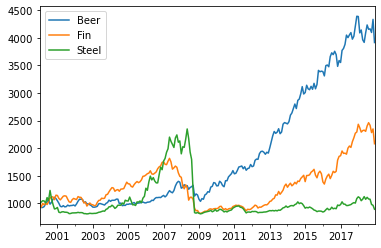

In [31]:
account_history['Beer'].plot(legend=True)
account_history['Fin'].plot(legend=True)
account_history['Steel'].plot(legend=True)


In [32]:
risky_wealth = start * (1 + risky_return).cumprod()

,Steel,Fin,Beer
2000-01,972.300000,955.800000,977.200000
2000-02,1038.805320,874.652580,863.453920
2000-03,1075.059626,1020.632096,864.576410
2000-04,1066.029125,977.255232,896.392822
2000-05,1013.580492,1026.704346,1002.794650
...,...,...,...
2018-08,1306.624224,3283.129665,4629.014147
2018-09,1297.869842,3219.765263,4637.809274
2018-10,1147.187153,3044.288056,4564.995669
2018-11,1112.771539,3132.267981,4829.308918
